# About a company
Bellabeat is a high-tech company that manufactures health-focused smart products. They have develop beautifully designed technology that informs and inspires women
around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.


# Business Task
Focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

# Questions that guide this study

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Load Libraries
`tidyverse` is a colecction of R packages that let us explore, analyse and visualization data. `janitor()` is a complement package to clean the data.


In [5]:
library(tidyverse)
library(janitor)

Import the files of [Fitbit](https://www.kaggle.com/datasets/arashnic/fitbit?rvi=1)

In [6]:
dailyactivity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate_seconds <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourlycalories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyintensities <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlysteps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minutecalories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")  
minuteintensities <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minutemets <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minutesteps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minutesleep <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this messag

## Explore the Data
Using functions `summary()` and `glimpse()` let us get a general view about the information. The number of rows, columns and `NA` values. In this way, consider which columns to join from different databases for a better analysis. For example, in the "weight" archive, "Fat" columns has a lot `NA` values so in the process stage, the column will be deleted. 

In [7]:
summary(weight)

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport      LogId          
 Min.   :22.00   Min.   :21.45   Mode :logical   Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   FALSE:26        1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   TRUE :41        Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                   Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                   3rd Qu.:1.462e+12  
 M

In [8]:
glimpse(weight)

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <dbl> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


### Tidyng Columns
For a better manage of coding, `clean_names()` convert the heads of columns to lowercase.

In [9]:
dailyactivity <- clean_names(dailyactivity)
heartrate_seconds <- clean_names(heartrate_seconds)
hourlycalories <- clean_names(hourlycalories)
hourlyintensities <- clean_names(hourlyintensities)
hourlysteps <- clean_names(hourlysteps)
minutecalories <- clean_names(minutecalories)
minuteintensities <- clean_names(minuteintensities)
minutemets <- clean_names(minutemets)
minutesteps <- clean_names(minutesteps)
minutesleep <- clean_names(minutesleep)
sleepday <- clean_names(sleepday)
weight <- clean_names(weight)

In this case, the `join()` function that allows us to join two or more data sets is useful to analyze the data in as few data sets as possible.

In [10]:
hourlycalories <- hourlycalories %>%
    left_join(hourlyintensities, by = c("id", "activity_hour"))

In [11]:
hourlycalories <- hourlycalories %>%
    left_join(hourlysteps, by = c("id", "activity_hour"))

In [12]:
glimpse(hourlycalories)

Rows: 22,099
Columns: 6
$ id                <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ activity_hour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/…
$ calories          <dbl> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73,…
$ total_intensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, …
$ average_intensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.…
$ step_total        <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 2…


In [13]:
minutecalories <- minutecalories %>%
    left_join(minuteintensities, by = c("id", "activity_minute"))

In [14]:
minutecalories <- minutecalories %>%
    left_join(minutemets, by = c("id", "activity_minute"))

In [15]:
minutecalories <- minutecalories %>%
    left_join(minutesteps, by = c("id", "activity_minute"))

In [16]:
glimpse(minutecalories)

Rows: 1,325,580
Columns: 6
$ id              <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396…
$ activity_minute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/1…
$ calories        <dbl> 0.7865, 0.7865, 0.7865, 0.7865, 0.7865, 0.9438, 0.9438…
$ intensity       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ me_ts           <dbl> 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 10, 10…
$ steps           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


## Analyze

With the `summary()` function it is possible to extract the arithmetic values of each variable. The ones that are most relevant in *dailyactivity* database are total steps and total distance.

In [17]:
summary(dailyactivity)

       id            activity_date       total_steps    total_distance  
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 tracker_distance logged_activities_distance very_active_distance
 Min.   : 0.000   Min.   :0.0000             Min.   : 0.000      
 1st Qu.: 2.620   1st Qu.:0.0000             1st Qu.: 0.000      
 Median : 5.245   Median :0.0000             Median : 0.210      
 Mean   : 5.475   Mean   :0.1082             Mean   : 1.503      
 3rd Qu.: 7.710   3rd Qu.:0.0000             3rd Qu.: 2.053      
 Max.   :28.030   Max.   :4.9421             Max.   :21.920      
 moderately_active_distance

The average total steps is 7,638, while the average total distance is 5,245 (there is no unit of mesure for this variable). Assuming the recommended steps per day are 8,000. The average is below what is recommended, one way to increase it would be to remind the user to walk a few more minutes.

In [18]:
summary(heartrate_seconds)

       id                time               value       
 Min.   :2.022e+09   Length:2483658     Min.   : 36.00  
 1st Qu.:4.388e+09   Class :character   1st Qu.: 63.00  
 Median :5.554e+09   Mode  :character   Median : 73.00  
 Mean   :5.514e+09                      Mean   : 77.33  
 3rd Qu.:6.962e+09                      3rd Qu.: 88.00  
 Max.   :8.878e+09                      Max.   :203.00  

The average heart rate is between 60 and 100, the average of the users is at a value of 77.33, so it is acceptable. However, a minimum value of 36 and maximum of 203 is shown. These values, if not due to exercise and prolonged time, could be a sign of a serious condition, so the user could be notified that they require medical attention or that can be directly notified to an emergency unit.

In [19]:
summary(sleepday)

       id             sleep_day         total_sleep_records
 Min.   :1.504e+09   Length:413         Min.   :1.000      
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000      
 Median :4.703e+09   Mode  :character   Median :1.000      
 Mean   :5.001e+09                      Mean   :1.119      
 3rd Qu.:6.962e+09                      3rd Qu.:1.000      
 Max.   :8.792e+09                      Max.   :3.000      
 total_minutes_asleep total_time_in_bed
 Min.   : 58.0        Min.   : 61.0    
 1st Qu.:361.0        1st Qu.:403.0    
 Median :433.0        Median :463.0    
 Mean   :419.5        Mean   :458.6    
 3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :796.0        Max.   :961.0    

The average sleep time is 419 minutes (7 hours), while the time in bed is 458 minutes (7 hours and 36 minutes). Users who are below the first quartile and whose sleep time is less than 361 minutes (6 hours) could be recommended to sleep an hour earlier in order to be within average values ​​of hours of sleep.

# Visualization

`geom_smooth()` using formula = 'y ~ x'


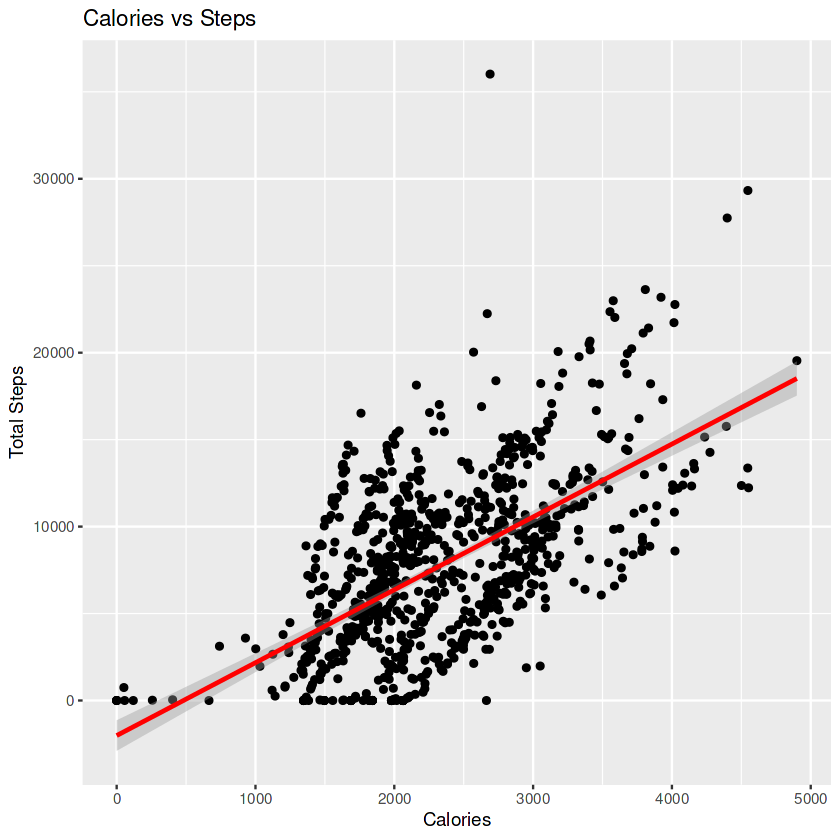

In [20]:
dailyactivity %>%
  ggplot(aes(x = calories, y = total_steps)) + 
  geom_jitter() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Calories vs Steps",
       x = "Calories", y = "Total Steps" )  

There is a positive relationship between total daily steps and calories burned. Therefore, an action to increase caloric expenditure would be to increase daily steps.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


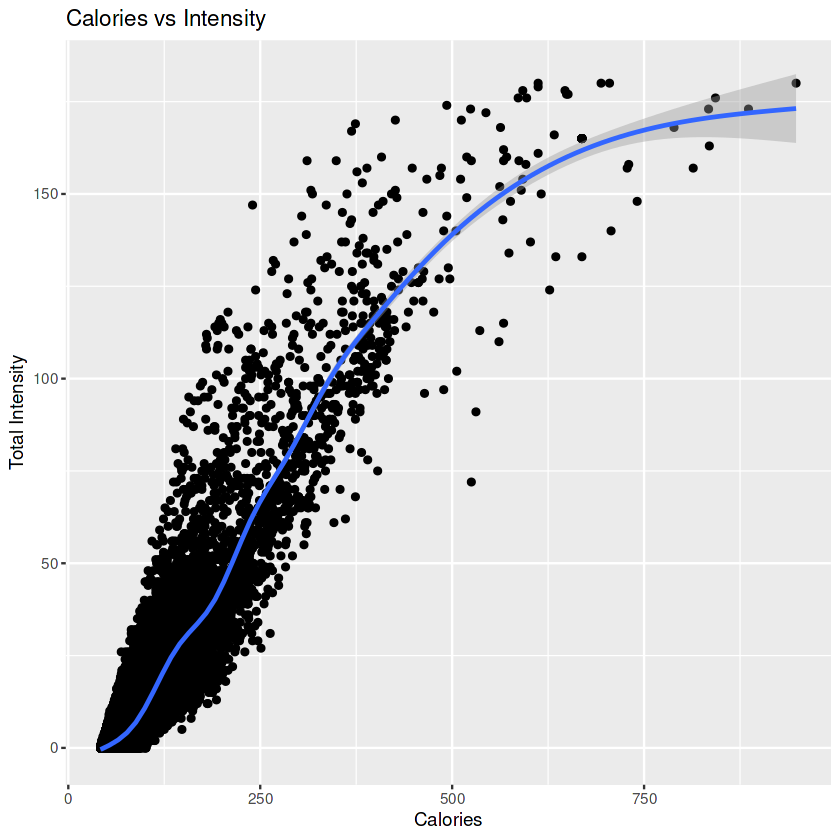

In [21]:
hourlycalories %>%
  ggplot(aes(x = calories, y = total_intensity)) +
  geom_point() + 
  geom_smooth() +
  labs(title = "Calories vs Intensity",
       x = "Calories", y = "Total Intensity" )  

Just as increasing daily steps increases caloric expenditure. Intensity is a factor that if we give priority to exercises with greater intensity, the expense will also increase.

# Conclusions

For a clear analysis it is important to have established the goals and trends to seek. Subsequently cleaning and organizing the databases is a process that will allow us to have a clearer analysis and therefore concise conclusions.

* The average value of the users' total steps is close to what is recommended, so setting a movement reminder could help reach the expected values.
* In records of very low (36) and very high (203) heart rate values, it could be confirmed with the user if they are feeling well. If you do not have notification, you can enable the option to automatically request emergency help.
* Recommending going to sleep an hour earlier would help the entire first quartile of users in this study who are below 7 hours of sleep reach the hours usually suggested
* Calories are positively related to the total number of steps as well as the intensity of training, so reminders could be generated to encourage users to walk more or suggestions for high-intensity training if their intention is to burn more calories.